# Agglomerative Clustering
By: Maya Louise Asuero, Godfred Rojas \
CSCI 271 - Data Mining

In [1]:
import numpy as np
import pandas as pd

In [2]:
# same data from spreadsheet
df = pd.DataFrame([[5,3],[15,12],[24,10],[30,30],[71,80],[60,78],[70,55]])

In [3]:
df

,0,1
0,5,3
1,15,12
2,24,10
3,30,30
4,71,80
5,60,78
6,70,55


In [4]:
from sklearn.cluster import AgglomerativeClustering

# linkage may be (single, complete, average)
# modify threshold in dendrogram below
model = AgglomerativeClustering(metric="euclidean", linkage="single", compute_distances=True)
model.fit(df)

AgglomerativeClustering(compute_distances=True, linkage='single')

In [5]:
model.distances_

array([ 9.21954446, 11.18033989, 13.45362405, 20.88061302, 25.01999201,
       47.16990566])

In [6]:
best_k = 0
largest_diff = 0
prev = 0
ctr = 0

for i in model.distances_:
   if  i - prev > largest_diff:
      largest_diff = i - prev
      best_k = len(df) - ctr
   ctr += 1
   prev = i
print("Best cluster k = ", best_k)

Best cluster k =  2


In [7]:
model.labels_

array([1, 1, 1, 1, 0, 0, 0], dtype=int64)

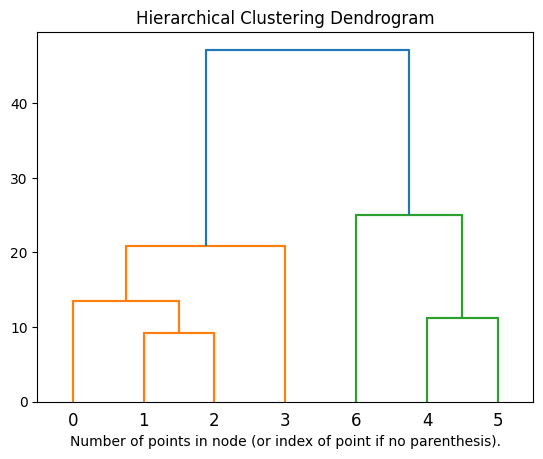

In [8]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

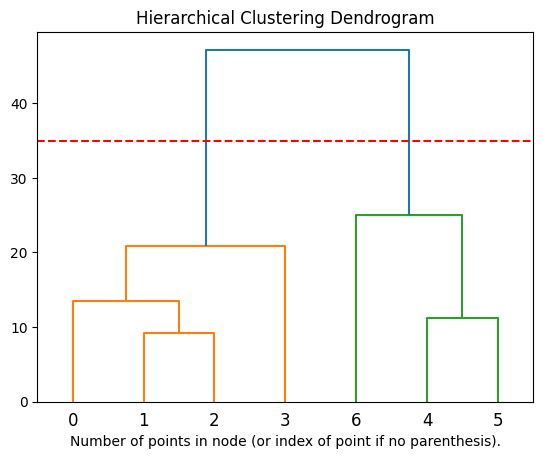

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plot_dendrogram(model, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.axhline(y=35, color='r', linestyle='--')  # Choose an appropriate threshold
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [10]:
# finding the best number of clusters via silhouette score
from sklearn.metrics import silhouette_score

best_score = 0
best_cluster = 0
for i in range(2,len(df)):
	val_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric="euclidean")
	score = round(silhouette_score(df,val_model.fit_predict(df)), 4)
	# prints all the scores
	print("Silhouette score = ", score, "; clusters = ", i)
	if score > best_score:
		best_score = score
		best_cluster = i

print("Best score: ", best_score, " at clusters = ", best_cluster)

Silhouette score =  0.7169 ; clusters =  2
Silhouette score =  0.5387 ; clusters =  3
Silhouette score =  0.3514 ; clusters =  4
Silhouette score =  0.281 ; clusters =  5
Silhouette score =  0.1228 ; clusters =  6
Best score:  0.7169  at clusters =  2
